In [18]:
pip install --upgrade scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


1. Load the dataset and make your preprocessing like normalizing the data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import time
import umap
from sklearn.manifold import TSNE

In [0]:
# We load the MNIST dataset below
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [21]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)
(10000, 784) (10000,)


2. Apply UMAP to the data.

In [22]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 16.140058517456055 seconds
UMAP done! Time elapsed: 16.49016046524048 seconds


3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [23]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

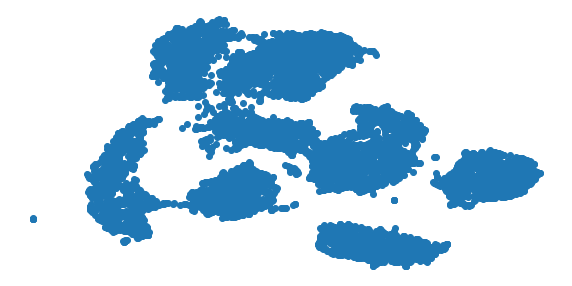

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
#UMAP does a better job when it comes to preserving the global structure as well as the local structure

5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

N-neigbors: 2


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:228: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


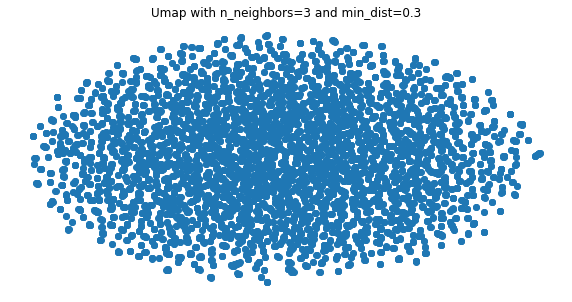

N-neigbors: 5


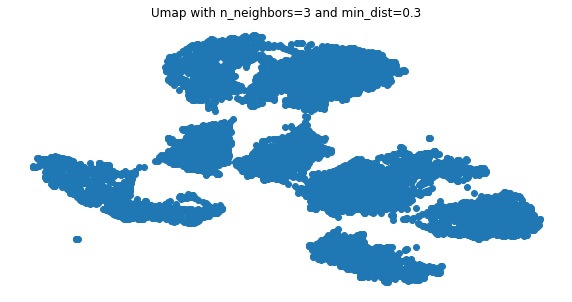

N-neigbors: 8


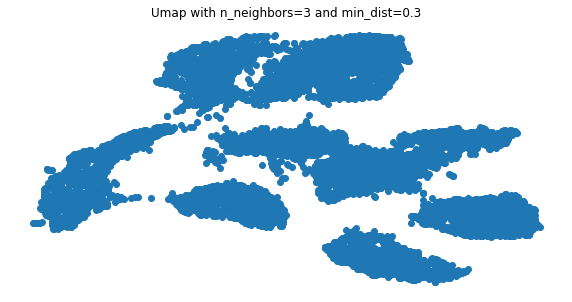

In [30]:
# Play with neigbors
for x in [2, 5, 8]:
  print("N-neigbors: {}".format(x))
  umap_results = umap.UMAP(n_neighbors=x,
                       min_dist=0.3,
                       metric='correlation').fit_transform(X)

  plt.figure(figsize=(10,5))
  plt.title("Umap with n_neighbors=3 and min_dist=0.3")
  plt.scatter(umap_results[:, 0], umap_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

In [0]:
#n-neighbors=5 seems to perform best

Min distance: 0.5


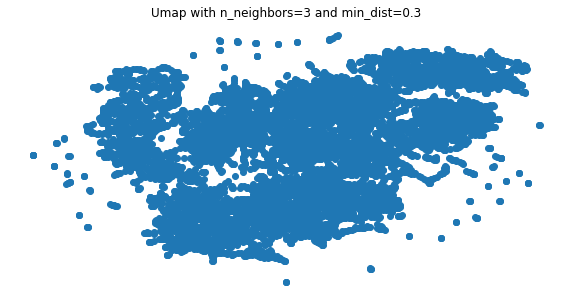

Min distance: 1


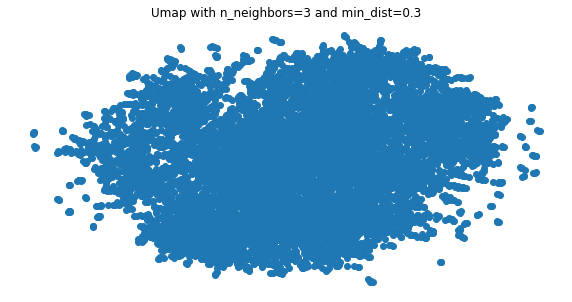

Min distance: 0.8


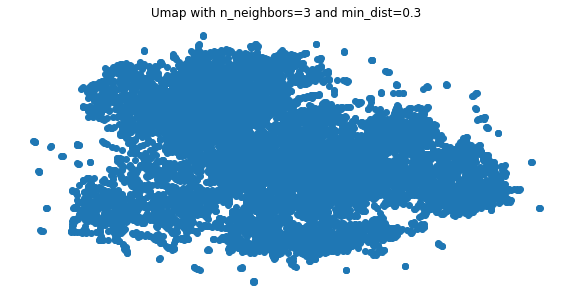

In [35]:
# Play with min distance

for x in [0.5, 1, 0.8]:
  print("Min distance: {}".format(x))
  umap_results = umap.UMAP(n_neighbors=3,
                       min_dist=x,
                       metric='correlation').fit_transform(X)

  plt.figure(figsize=(10,5))
  plt.title("Umap with n_neighbors=3 and min_dist=0.3")
  plt.scatter(umap_results[:, 0], umap_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()